# Restricted Boltzmann Machines - Redução da Dimensionalidade

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.neural_network import BernoulliRBM
from sklearn.model_selection import train_test_split
# Importação da classe para rede neural utilizando o scikit-learn
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

## Obter os dados

In [3]:
base = datasets.load_digits()

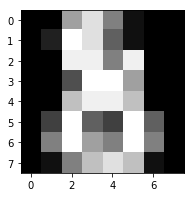

In [4]:
# 1º digito
plt.figure(figsize=(3, 3))
plt.imshow(base.images[-1], cmap="gray")
plt.show()

In [5]:
# Matriz com os pixeis da imagem
# Matriz 8x8
pixeis = base.images[-1]
pixeis.shape

(8, 8)

In [6]:
X = np.asarray(base.data)

In [7]:
y = base.target

# Pré-Processamento dos dados

### Conversão dos dados para float32

In [9]:
# Como os dados vão ser convertidos para uma escala entre 0 e 1 tem-se de converter os dados de inteiro8 para float32 para que
# os valores obtidos depois da normalização não sejam inteiros e consequentemente quase todos 0(por não haver números decimais).
# Neste caso não era necessários porque os dados já são do tipo float64
X[0:0]

array([], shape=(0, 64), dtype=float64)

In [10]:
# Conversão dos dados em float 32.
X = X.astype("float32")

In [11]:
# Verificação.
X[0:0]

array([], shape=(0, 64), dtype=float32)

### Normalização dos pixeis

In [12]:
# passar os pixeis para uma escala de 0 a 1 para que o precessamento dos dados seja mais rapido
# Isto pode ser feito através da tecnica min max normalization. Como cada pixel ocupa 1 byte e o byte consegue guardar 256
# resultados possiveis(ou seja varia entre 0 e 255). 
# A normalização pode ser feita dividindo o pixel por 255 ou tambem se pode utilizar o skit-learn MinMaxScaler.

# Pode-se ver que o valor máximo de um pixel é de 255
X[9].max()

16.0

In [13]:
# Normalizador
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
# Ajustar e normalizar as variaveis de entrada
X = scaler.fit_transform(X)

## Divisão treino-teste

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [16]:
X_train.shape

(1437, 64)

## Modelo da Restricted Boltzmann Machine

In [17]:
# Não é necessário definir o número de neurónios na camada de entrada porque durante o treino o modelo sabe que são 64.
# Matriz 8x8 pixeis=64 neurónios.

# Processo de treino
# Multiplicar os valores da camada de entrada pelos pesos(definidos aleatoriamente) para se obter os valores da camada oculta.
# Com os valores da camada oculta reconstruir os valores da camada de entrada(registros)
# Com os novos valores da camada de entrada obter os valores da camada oculta(multiplicando esses valores pelos pesos).
# Com os novos valores da camada oculta reconstruir os valores da camada de entrada.
# Estes passos são repetidos até um determinado numero de épocas ou até os registros obtidos na ultima iteração serem iguais 
# aos registros originais.
# A reconstrução dos nós é feita utilizando a técnica de gibbs sampling.
# Cada nó da camada de entrada é reconstruido utilizando todos os nós da camada oculta.
# Os pesos não são actualizados durante os calculos. Os pesos aleatorios definidos no inicio mantêm-se durante todo o processo. 
# Só são actualizados no fim do processo(depois de todas as épocas ou depois dos registros obtidos na ultima epoca serem iguais
# aos registros originais).

# O que o algoritmo está a tentar fazer é através dos valores da camada de entrada(com por exemplo 6 neurónios) gerar outros
# novos valores(por exemplo 2 neurónios) e com esses novos valores(por exemplo 2 neurónios) gerar os valores da camada de
# entrada original(com por exemplo 6 neurónios).
# Ou seja funciona como a redução da dimensionalidade. Por exemplo tenta-se passar de 6 dimensões para 2 dimensões mantendo o
# máximo de informação possivel.

model = BernoulliRBM(random_state = 0)
model.n_iter = 25   # Número de épocas
model.n_components = 50 # Número de neurónios na camada oculta. Deve-se fazer o Gidsearch para encontrar o melhor valor

In [20]:
# Criação e configuração da rede neural usando o scikit-learn
# hidden_layer_sizes: cria as camadas escondidas, sendo que cada número 37 representa uma camada. Neste exemplo tem-se duas 
# camadas escondidas com 37 neurônios cada uma - usada a fórmula (entradas + saídas) / 2 = (64 + 10) / 2 = 37.
# max_iter: No máximo 1000 épocas, quando a loos function não melhora depois de um certo número de épocas a execução para.
# No scikit-learn não é necessário configurar a camada de saída, porque isso é feito automaticamente. Definimos o  O parâmetro 
# verbose: 1 para exibir as mensagens.
neural_network = MLPClassifier(hidden_layer_sizes = (37, 37),
                        activation = 'relu', 
                        solver = 'adam',
                        batch_size = 50,
                        max_iter = 1000,
                        verbose = 1)

In [21]:
# Para executar mais de um processo de uma vez (tambem se podia fazer esses passos um após o outro).
# Executa o modelo RBM para reduzir a dimensionalidade. De seguida faz-se o treino da rede neural.
model_rbm = Pipeline(steps = [('rbm', model), ('neural network', neural_network)])

In [22]:
# Ajustar os dados de entrada de treino aos dados de saida de treino para treinar o modelo.
model_rbm.fit(X_train, y_train)

Iteration 1, loss = 2.22485663
Iteration 2, loss = 1.91791032
Iteration 3, loss = 1.53199973
Iteration 4, loss = 1.13221422
Iteration 5, loss = 0.82856214
Iteration 6, loss = 0.63578179
Iteration 7, loss = 0.52297653
Iteration 8, loss = 0.44994743
Iteration 9, loss = 0.39708009
Iteration 10, loss = 0.36433616
Iteration 11, loss = 0.33563055
Iteration 12, loss = 0.31557420
Iteration 13, loss = 0.29565092
Iteration 14, loss = 0.28149015
Iteration 15, loss = 0.27049959
Iteration 16, loss = 0.25821287
Iteration 17, loss = 0.25452278
Iteration 18, loss = 0.24127401
Iteration 19, loss = 0.23531451
Iteration 20, loss = 0.23114606
Iteration 21, loss = 0.22241911
Iteration 22, loss = 0.21688134
Iteration 23, loss = 0.21278986
Iteration 24, loss = 0.20813024
Iteration 25, loss = 0.20686838
Iteration 26, loss = 0.20269955
Iteration 27, loss = 0.19874126
Iteration 28, loss = 0.19294306
Iteration 29, loss = 0.19116408
Iteration 30, loss = 0.18729420
Iteration 31, loss = 0.18390903
Iteration 32, los

Iteration 256, loss = 0.02967953
Iteration 257, loss = 0.03050210
Iteration 258, loss = 0.03133217
Iteration 259, loss = 0.03002768
Iteration 260, loss = 0.03062089
Iteration 261, loss = 0.02922206
Iteration 262, loss = 0.03056696
Iteration 263, loss = 0.02982445
Iteration 264, loss = 0.02739860
Iteration 265, loss = 0.02911129
Iteration 266, loss = 0.02827870
Iteration 267, loss = 0.02906664
Iteration 268, loss = 0.02807859
Iteration 269, loss = 0.03151055
Iteration 270, loss = 0.02946773
Iteration 271, loss = 0.02981772
Iteration 272, loss = 0.02877032
Iteration 273, loss = 0.02782396
Iteration 274, loss = 0.03016619
Iteration 275, loss = 0.02807151
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Pipeline(memory=None,
     steps=[('rbm', BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=50, n_iter=25,
       random_state=0, verbose=0)), ('neural network', MLPClassifier(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_siz...ffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False))])

## Previsão e Avaliação do Modelo CNN

### Visualização das novas imagens

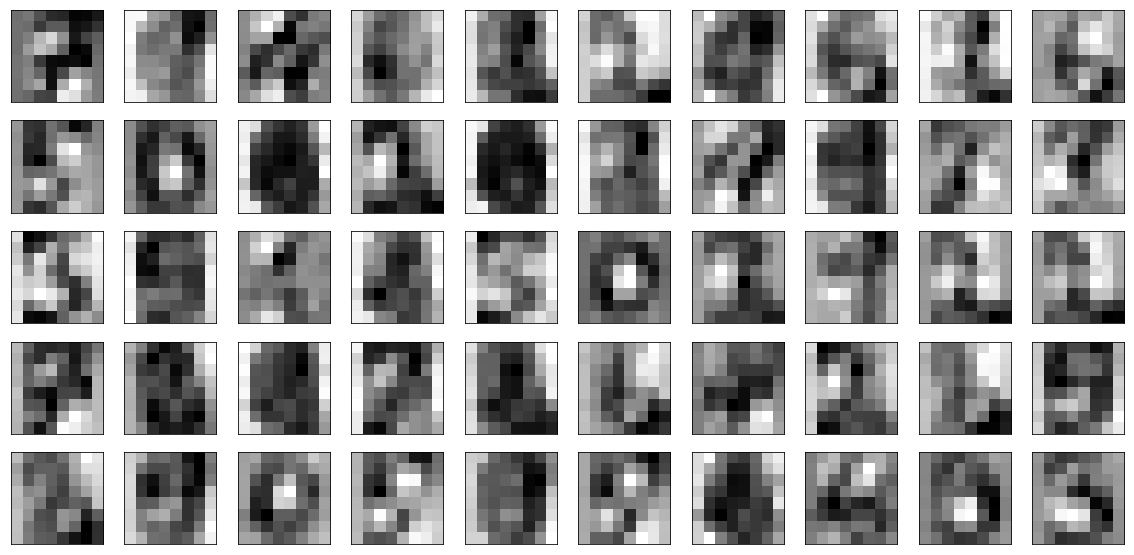

In [23]:
# Imagens com um menor número de pixeis feito através da redução da dimensionalidade(passou-se de 60 pixeis para 50, que é o
# número de neurónios da camada oculta da Restricted Boltzman Machine).

plt.figure(figsize=(20,20))
for i, comp in enumerate(model.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8,8)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.show()

### Avaliação do modelo

In [24]:
predictions = model_rbm.predict(X_test)
predictions[3]

6

In [27]:
# Comparação entre os números obtidos usando o X_test(predicion) e y_test(reais).
pd.DataFrame({"prediction index": predictions, "teste index":y_test}).head(5)

,prediction index,teste index
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
#Relatório de classificação
#Ver como o modelo se ajusta para os dados de teste
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.89      0.94        35
           2       1.00      0.94      0.97        36
           3       0.88      1.00      0.94        29
           4       0.97      0.97      0.97        30
           5       0.95      0.95      0.95        40
           6       1.00      0.98      0.99        44
           7       0.95      0.97      0.96        39
           8       0.86      0.97      0.92        39
           9       0.95      0.88      0.91        41

   micro avg       0.95      0.95      0.95       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.95      0.95       360



In [30]:
# Calculo da precision utilizando o metrics do SkLearn
precision = metrics.accuracy_score(predictions, y_test)
precision

0.9527777777777777

In [31]:
confusion = confusion_matrix(y_test,predictions)

In [32]:
#Matriz de confusão
outside_columns = ["","","","","Predicted","","","","",""]
outside_index = ["","","","","Actual","","","","",""]
inside = ["0","1","2","3","4","5","6","7","8","9"]

hier_columns = list(zip(outside_columns, inside))
hier_columns = pd.MultiIndex.from_tuples(hier_columns)

hier_index = list(zip(outside_index, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

pd.DataFrame(confusion, columns=hier_columns, index = hier_index)

Predicted                    
           0   1   2   3         4   5   6   7   8   9
       0  27   0   0   0         0   0   0   0   0   0
       1   0  31   0   0         0   1   0   0   3   0
       2   0   0  34   1         0   0   0   0   1   0
       3   0   0   0  29         0   0   0   0   0   0
Actual 4   0   0   0   0        29   0   0   1   0   0
       5   0   0   0   0         0  38   0   0   0   2
       6   0   0   0   0         0   0  43   0   1   0
       7   0   0   0   0         1   0   0  38   0   0
       8   0   0   0   0         0   0   0   1  38   0
       9   0   0   0   3         0   1   0   0   1  36

### Previsão de uma imagem

In [40]:
image = np.expand_dims(X_test[4],axis = 0)
image.shape

(1, 64)

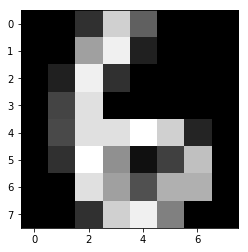

In [41]:
# Visualização do número da imagem
plt.imshow(X_test[4].reshape(8,8), cmap="gray")

In [42]:
# Previsão do número na imagem

# Como é um problema de classificação multiclasse, considera-se que a imagem pertence à classe que tem a probabilidade mais 
# alta.
result = model_rbm.predict(image)
result

array([6])

# Sem utilização da redução de dimensionalidade

In [33]:
# Criação da rede neural simples sem o uso da redução de dimensionalidade
neural_network_simples = MLPClassifier(hidden_layer_sizes = (37, 37),
                        activation = 'relu', 
                        solver = 'adam',
                        batch_size = 50,
                        max_iter = 1000,
                        verbose = 1)

In [34]:
# Ajuste do modelo Naive Bayes aos dados de treino para fazer o treino do modelo.
neural_network_simples.fit(X_train, y_train)

Iteration 1, loss = 2.18653895
Iteration 2, loss = 1.89565109
Iteration 3, loss = 1.50334385
Iteration 4, loss = 1.05156151
Iteration 5, loss = 0.71501805
Iteration 6, loss = 0.51606560
Iteration 7, loss = 0.40124493
Iteration 8, loss = 0.32848677
Iteration 9, loss = 0.27742705
Iteration 10, loss = 0.24409105
Iteration 11, loss = 0.21487278
Iteration 12, loss = 0.18931663
Iteration 13, loss = 0.17369600
Iteration 14, loss = 0.15693028
Iteration 15, loss = 0.14202328
Iteration 16, loss = 0.13148260
Iteration 17, loss = 0.12171345
Iteration 18, loss = 0.11536189
Iteration 19, loss = 0.10624933
Iteration 20, loss = 0.09776273
Iteration 21, loss = 0.09057039
Iteration 22, loss = 0.08729899
Iteration 23, loss = 0.08195973
Iteration 24, loss = 0.07751998
Iteration 25, loss = 0.07372016
Iteration 26, loss = 0.07050672
Iteration 27, loss = 0.06652948
Iteration 28, loss = 0.06373157
Iteration 29, loss = 0.06116518
Iteration 30, loss = 0.05773766
Iteration 31, loss = 0.05328186
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(37, 37), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [36]:
# Previsões para os dados de teste.
predictions_neural_network = neural_network_simples.predict(X_test)

In [38]:
# Calculo da precison do modelo.
predictions_neural_network = metrics.accuracy_score(predictions_neural_network, y_test)

In [39]:
# precision de 0.95. Com a redução de dimensionalidade tem-se precision de 0.97.
predictions_neural_network

0.9777777777777777